In [8]:
!pip install seaborn

In [10]:
!pip install squarify

In [ ]:
!pip install plotly

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
pd.options.mode.chained_assignment = None


In [7]:
funding_data = pd.read_csv(r"E:\powerbi\project\startup funding\archive\startup_funding.csv")
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [8]:
funding_data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [9]:
print("Size of data (Rows, Columns):", funding_data.shape)

Size of data (Rows, Columns): (2372, 10)


In [10]:
total = funding_data.isnull().sum().sort_values(ascending = False)
percent = ((funding_data.isnull().sum()/funding_data.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head()

,Total,Percent %
Remarks,1953,82.335582
SubVertical,936,39.460371
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106


In [11]:
funding_data

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [12]:
del funding_data["Remarks"]
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


In [13]:
funding_data["AmountInUSD"] = funding_data["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))

In [14]:
funding_data

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0
...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [17]:
funding_data["AmountInUSD"] = pd.to_numeric(funding_data["AmountInUSD"])

In [18]:
funding_data

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0
...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


Number of funding per month in decreasing order (Top 10)
 yearmonth
201601    104
201602    100
201606     98
201507     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: count, dtype: int64


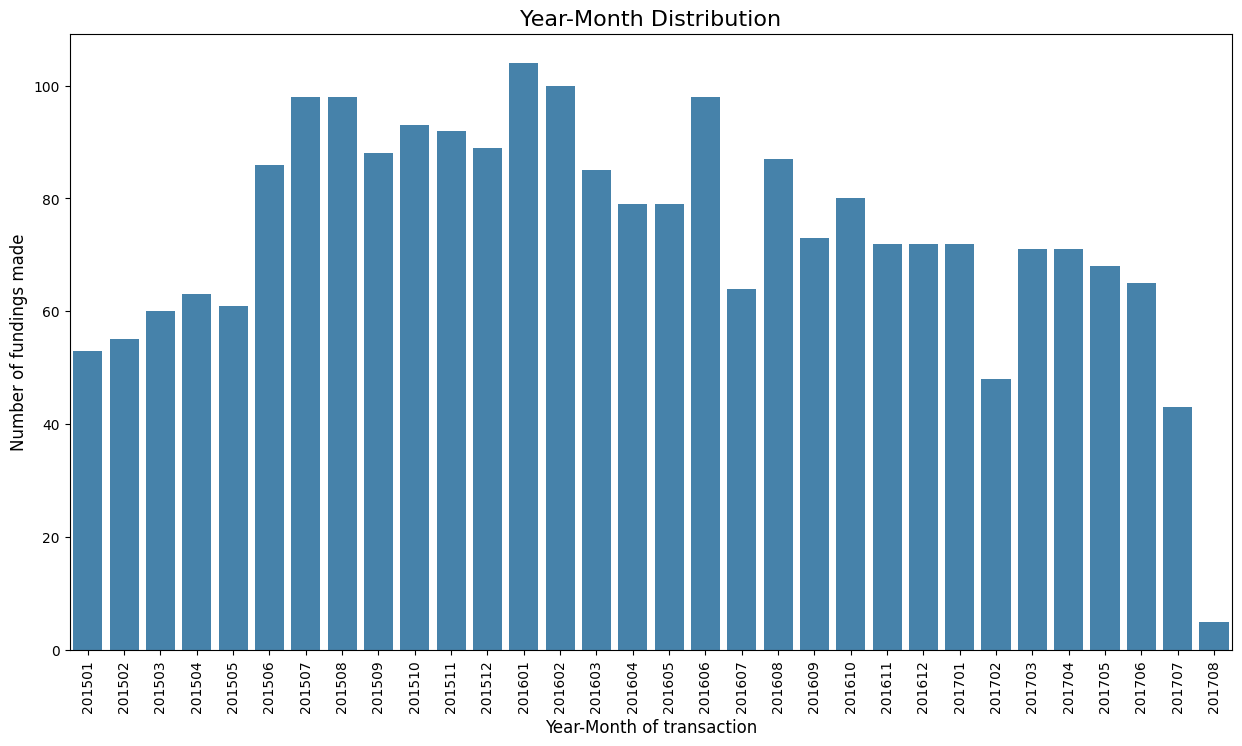

In [24]:
funding_data.loc[funding_data['Date'] == '12/05.2015', 'Date'] = '12/05/2015'
funding_data.loc[funding_data['Date'] == '13/04.2015', 'Date'] = '13/04/2015'
funding_data.loc[funding_data['Date'] == '15/01.2015', 'Date'] = '15/01/2015'
funding_data.loc[funding_data['Date'] == '22/01//2015', 'Date'] = '22/01/2015'

funding_data["yearmonth"] = (pd.to_datetime(funding_data['Date'], format='%d/%m/%Y').dt.year * 100) + \
                             (pd.to_datetime(funding_data['Date'], format='%d/%m/%Y').dt.month)
temp = funding_data['yearmonth'].value_counts().sort_values(ascending=False).head(10)
print("Number of funding per month in decreasing order (Top 10)\n", temp)
year_month = funding_data['yearmonth'].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=year_month.index, y=year_month.values, alpha=0.9, color=color[0])  # Use x= and y= parameters
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

In [29]:
print("Maximum funding to a Startups is : ",funding_data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  1400000000.0


In [30]:
funding_data[funding_data.AmountInUSD == 1400000000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703


In [31]:
funding_data[funding_data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
821,821,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
1787,1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2218,2218,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,201503
2276,2276,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN,201502


In [32]:
print("Minimum funding to a Startups is : ",funding_data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  16000.0


In [33]:
funding_data[funding_data.AmountInUSD == 16000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
2345,2345,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2346,2346,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2347,2347,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2348,2348,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2349,2349,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


In [35]:
print("Average indian startups got funding of : ",funding_data["AmountInUSD"].dropna().sort_values().mean())

Average indian startups got funding of :  12031073.099016393


In [36]:
print("Total startups funded : ", len(funding_data["StartupName"].unique()))
print(funding_data["StartupName"].value_counts().head(10))
startupname = funding_data['StartupName'].value_counts().head(20)

Total startups funded :  2001
StartupName
Swiggy       7
UrbanClap    6
Medinfi      5
Jugnoo       5
Paytm        5
NoBroker     5
Voonik       4
Byju’s       4
HolaChef     4
Wooplr       4
Name: count, dtype: int64


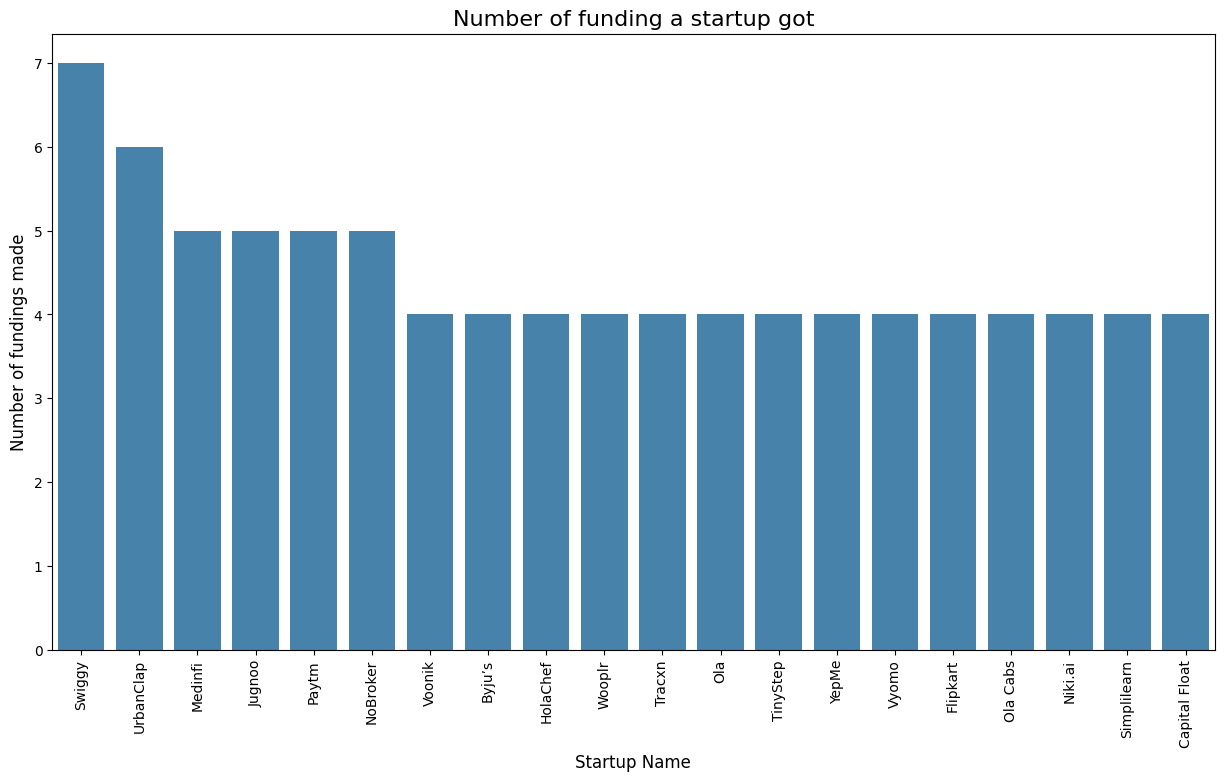

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(x=startupname.index, y=startupname.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a startup got", fontsize=16)
plt.show()

In [39]:
industry = funding_data['IndustryVertical'].value_counts().head(10)
print(industry)

IndustryVertical
Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: count, dtype: int64


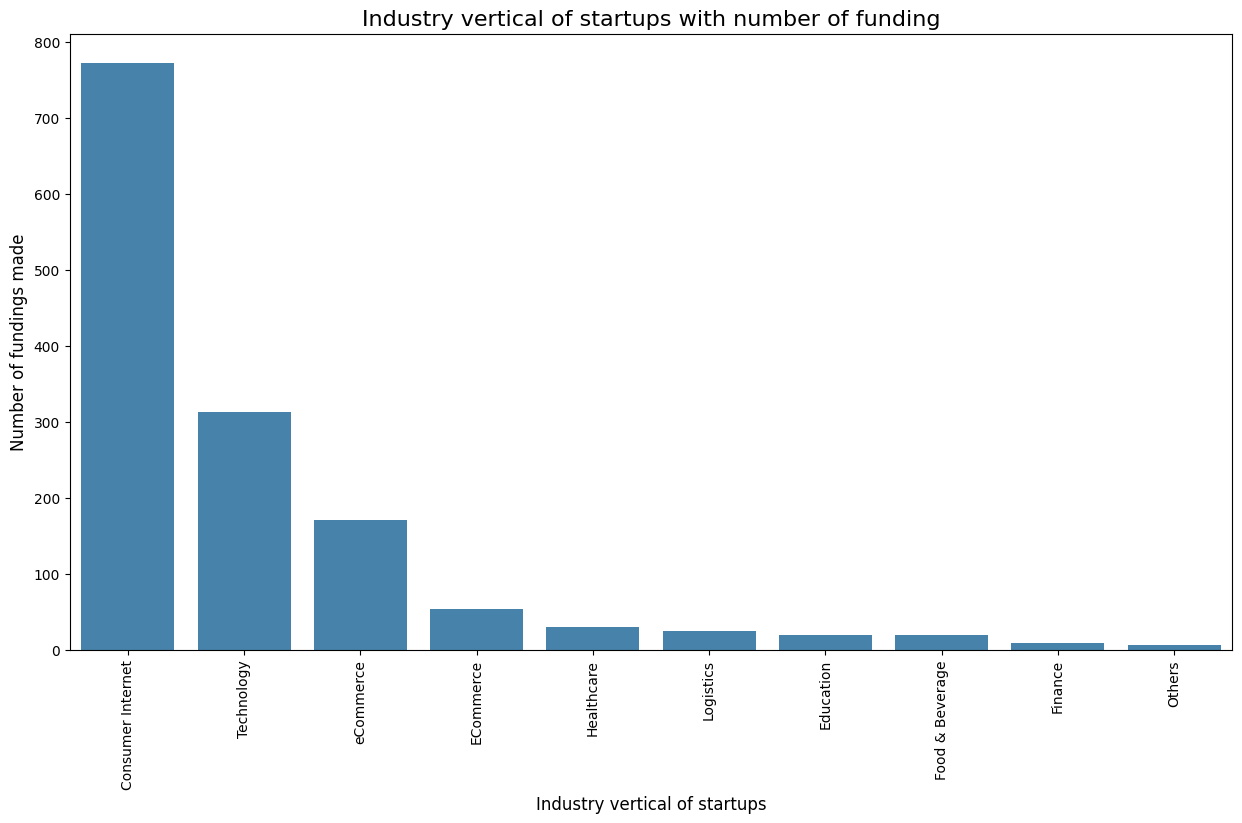

In [43]:
plt.figure(figsize=(15,8))
sns.barplot(x=industry.index, y=industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

SubVertical
Online Pharmacy                   9
Food Delivery Platform            8
Online lending platform           5
Online Learning Platform          4
ECommerce Marketplace             3
Online Payment Gateway            3
Fitness Mobile App                3
Data Analytics platform           3
Food Ordering Mobile App          2
Healthy Food Delivery platform    2
Name: count, dtype: int64


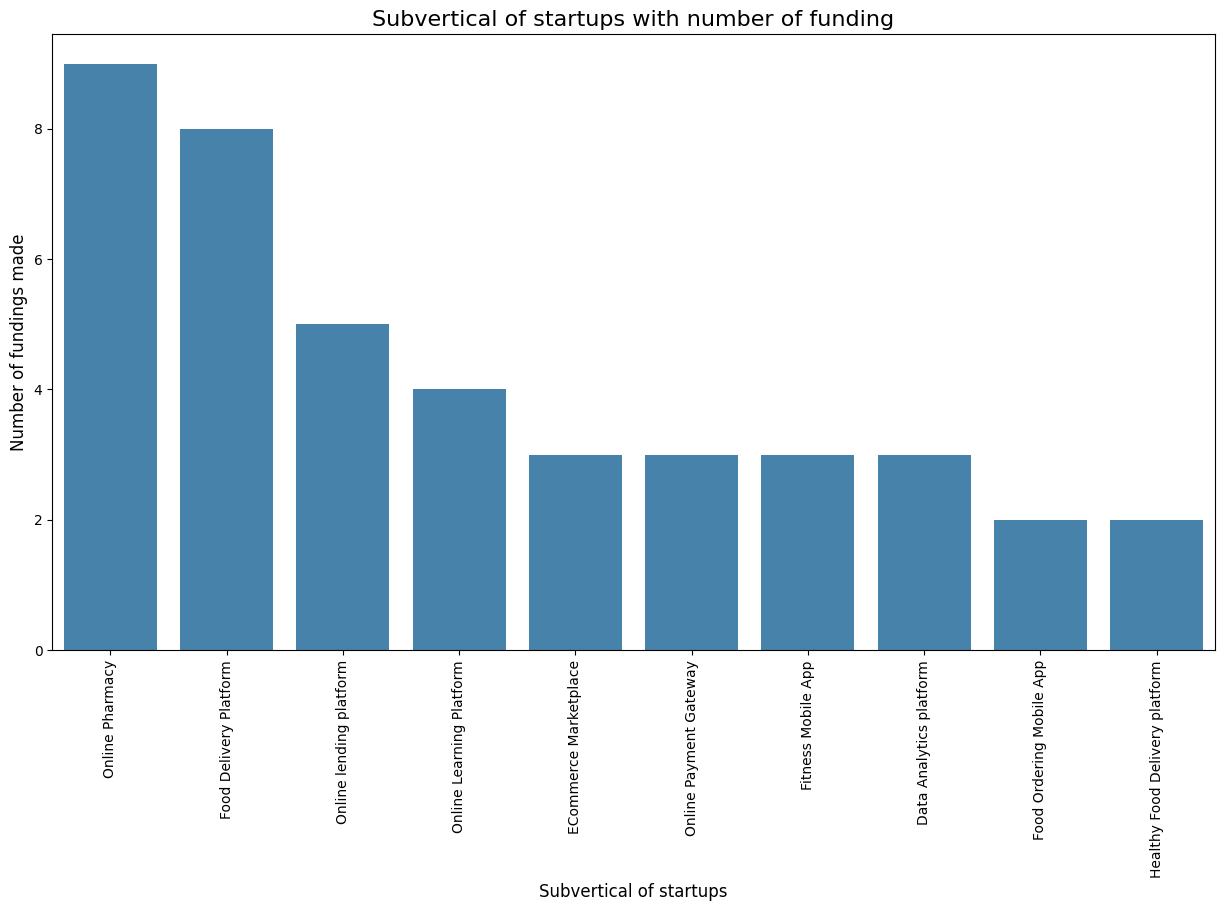

In [44]:
industry = funding_data['SubVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(x=industry.index, y=industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

CityLocation
Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: count, dtype: int64


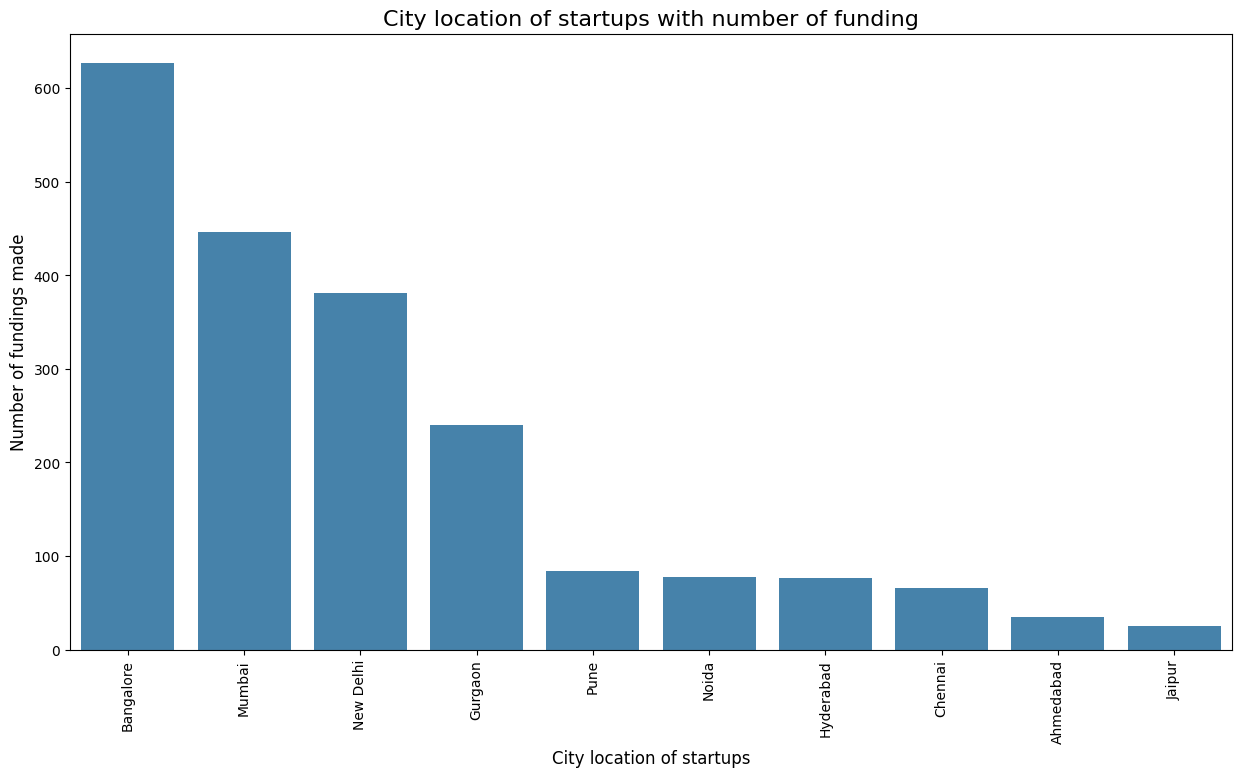

In [45]:
city = funding_data['CityLocation'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(x=city.index, y=city.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('City location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("City location of startups with number of funding", fontsize=16)
plt.show()

In [49]:
investors = funding_data['InvestorsName'].value_counts().head(10)
print(investors)

InvestorsName
Undisclosed Investors       33
Undisclosed investors       27
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
Brand Capital               10
Undisclosed Investor        10
Name: count, dtype: int64


In [56]:
funding_data['InvestorsName'] = funding_data['InvestorsName'].replace(
    ['Undisclosed Investors', 'Undisclosed investors', 'undisclosed investors', 'Undisclosed Investor','Undisclosed investor','Undisclosed'], 
    'Undisclosed Investors'
)

In [57]:
investors = funding_data['InvestorsName'].value_counts().head(10)
print(investors)

InvestorsName
Undisclosed Investors       99
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
RoundGlass Partners         10
Brand Capital               10
Accel Partners               9
SAIF Partners                9
Name: count, dtype: int64


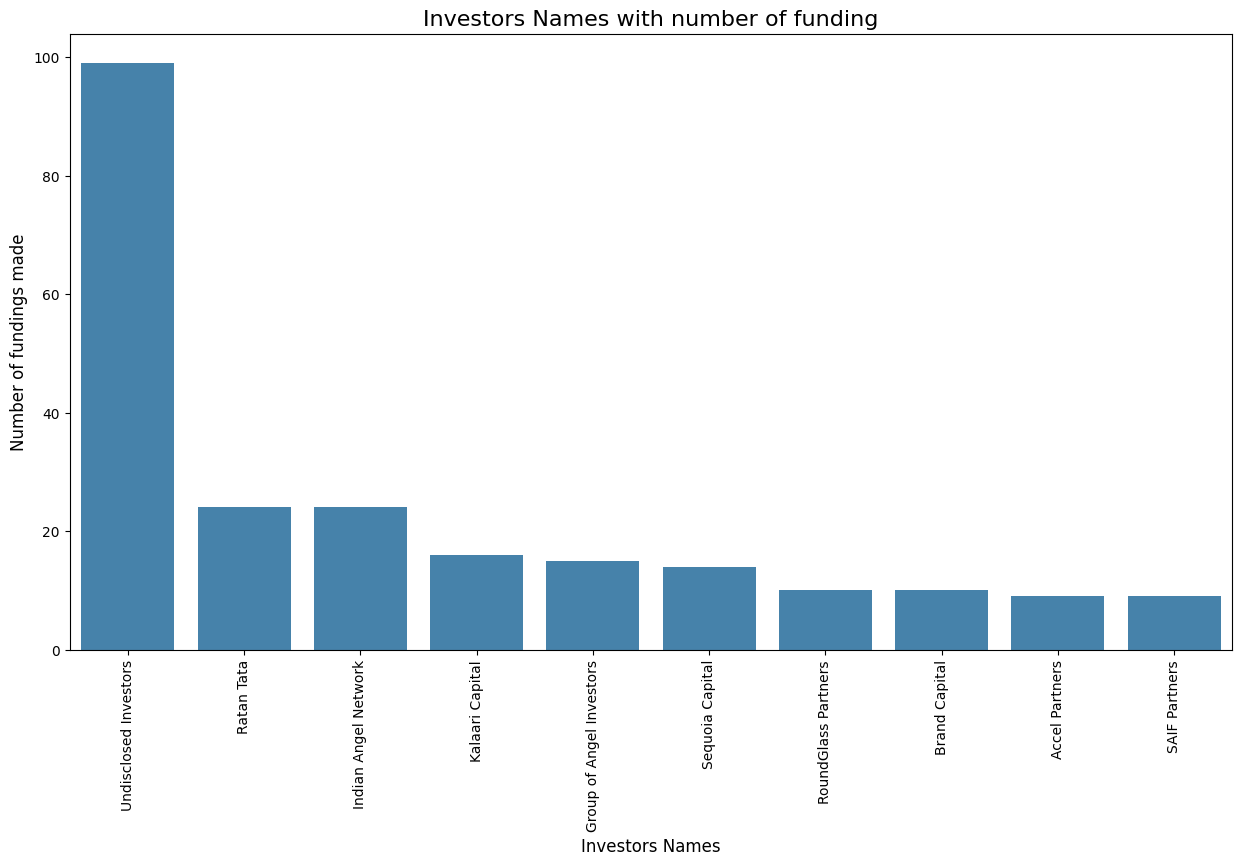

In [58]:
plt.figure(figsize=(15,8))
sns.barplot(x=investors.index, y=investors.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

In [59]:
investment = funding_data['InvestmentType'].value_counts()
investment

InvestmentType
Seed Funding      1271
Private Equity    1066
SeedFunding         30
Debt Funding         1
PrivateEquity        1
Crowd funding        1
Crowd Funding        1
Name: count, dtype: int64

In [60]:
funding_data['InvestmentType'] = funding_data['InvestmentType'].replace(
    ['SeedFunding', 'Seed Funding'], 'Seed Funding')

funding_data['InvestmentType'] = funding_data['InvestmentType'].replace(
    ['PrivateEquity', 'Private Equity'], 'Private Equity')

funding_data['InvestmentType'] = funding_data['InvestmentType'].replace(
    ['Crowd funding', 'Crowd Funding'], 'Crowd Funding')

In [62]:
investment_type = funding_data['InvestmentType'].value_counts()
print(investment_type)

InvestmentType
Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: count, dtype: int64


InvestmentType
Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: count, dtype: int64


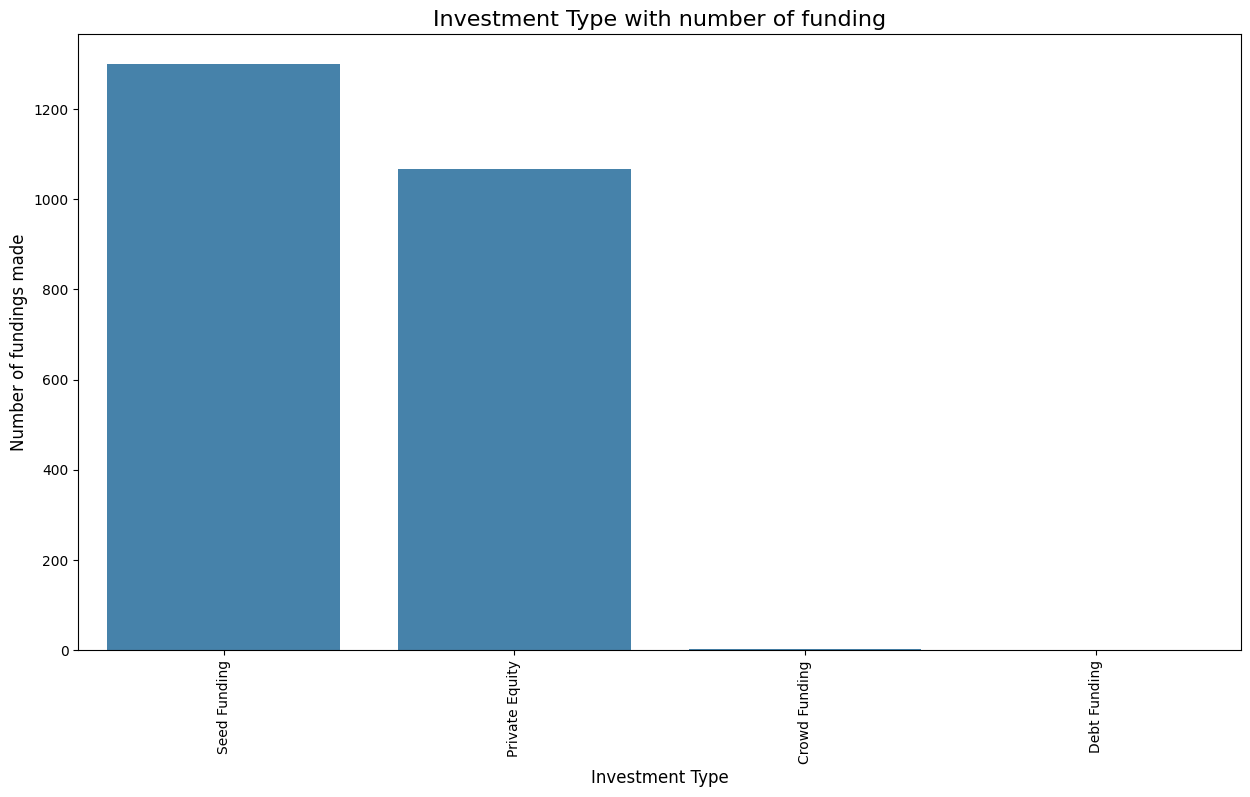

In [63]:
investment = funding_data['InvestmentType'].value_counts()
print(investment)
plt.figure(figsize=(15,8))
sns.barplot(x=investment.index, y=investment.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

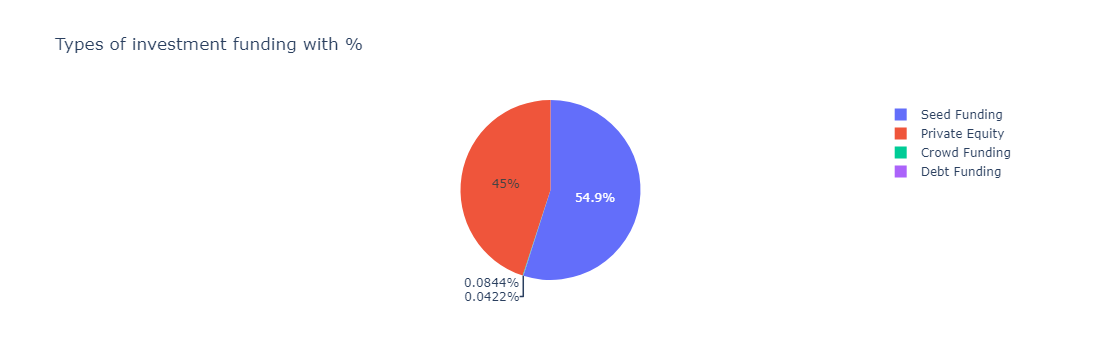

In [72]:
temp = funding_data["InvestmentType"].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Types of investment funding with %')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

In [73]:
# Exporting DataFrame to Excel
output_path = "funding_data_output.xlsx"  # Specify your output file path
funding_data.to_excel(output_path, index=False)  # Set index=False to exclude the DataFrame index

print(f"DataFrame exported successfully to {output_path}")


DataFrame exported successfully to funding_data_output.xlsx
